In [ ]:
#What is the goal of applying K-Means clustering in this dataset?

the goal of applying K-Means clustering is to segment students into distinct groups based on their study hour and exam score.this helps to understand and identify different student performance 

In [ ]:
#How many clusters (K) do you think are appropriate? Justify your answer.
3 clusters because the data naturally forms three distinct groups. One group represents students with low study hours and low exam scores, a second group for those with a moderate amount of study and average scores, and a third group for students with high study hours and high scores.

   Student_ID  Study_Hours  Exam_Score
0           1            2          20
1           2            3          25
2           3            4          28
3           4            6          45
4           5            7          50


C:\Users\gouth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


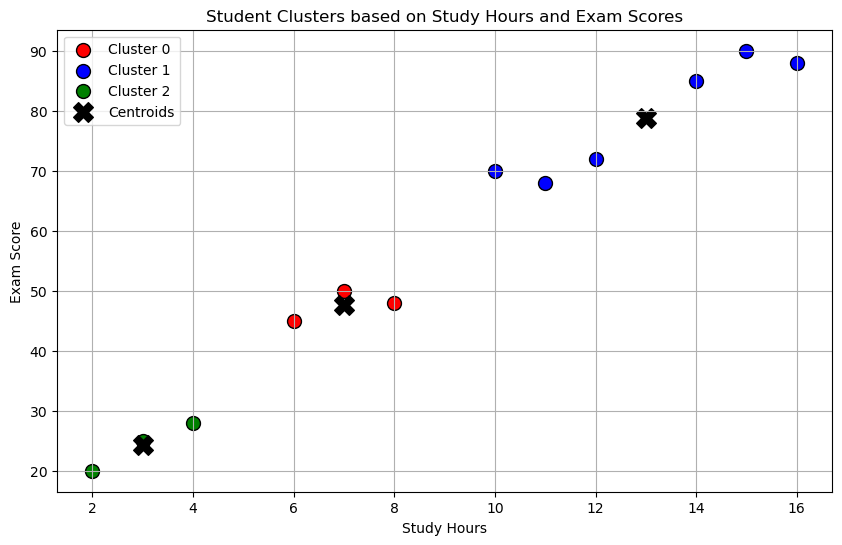

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data for students
df=pd.read_csv("student_kmeans_dataset.csv")
print(df.head())


# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Study_Hours', 'Exam_Score']])

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

for cluster in range(3):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Study_Hours'], clustered_data['Exam_Score'],
                label=f'Cluster {cluster}', color=colors[cluster], s=100, edgecolor='k')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
# Add titles and labels
plt.title('Student Clusters based on Study Hours and Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Interpret each cluster: what type of students does it represent?
cluster 0 represents -low study hours and low exam score
cluster 1 represents high study hours and high exam score
cluster 2 represents moderate study hours and moderate exam score

In [ ]:
#How can the university use these clusters for personalized interventions?
the university can support students based on their needs
helps students improve, stay motivated, ans succeed
makes sure help is given where its needed most

In [ ]:
#What challenges/limitations do you see in using K-Means clustering for this dataset?
we need to know how many groups in advance
sensitive to outliers
if it is small dataset the results will be unstable

In [ ]:
#If new students join the dataset, how would the clustering need to be updated?
the current clusters are created based on the old data
adding new students might change the pattern or create new groups so we need to update the model with the new student data

C:\Users\gouth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gouth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


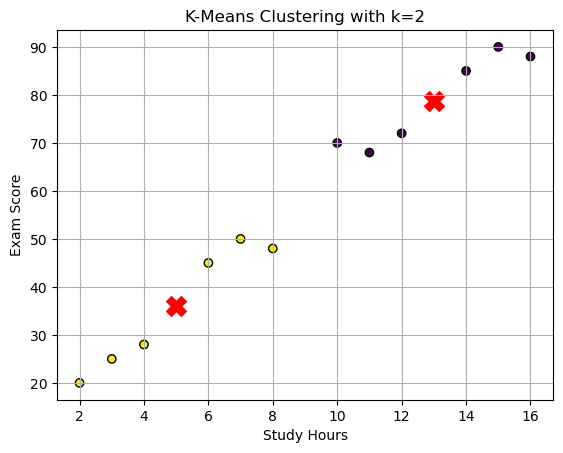

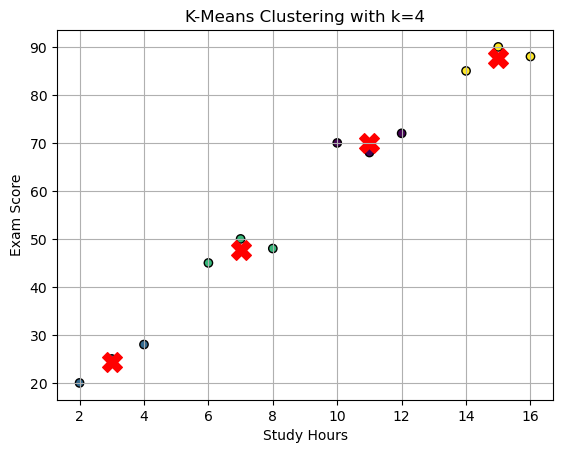

In [5]:
X=df[['Study_Hours','Exam_Score']]
# Apply KMeans for k=2
kmeans_2 = KMeans(n_clusters=2, random_state=0)
df['Cluster_k2'] = kmeans_2.fit_predict(X)

# Apply KMeans for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
df['Cluster_k4'] = kmeans_4.fit_predict(X)

# Function to plot clusters
def plot_clusters(X, labels, centers, title):
    plt.scatter(X['Study_Hours'], X['Exam_Score'], c=labels, cmap='viridis', edgecolor='k')
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X')
    plt.title(title)
    plt.xlabel('Study Hours')
    plt.ylabel('Exam Score')
    plt.grid(True)
    plt.show()

# Plot for k=2
plot_clusters(X, df['Cluster_k2'], kmeans_2.cluster_centers_, 'K-Means Clustering with k=2')

# Plot for k=4
plot_clusters(X, df['Cluster_k4'], kmeans_4.cluster_centers_, 'K-Means Clustering with k=4')

In [ ]:
k=2 makes more sense because it is easy to explain and avoids overfitting with small data

In [ ]:
#Suggest one improvement or alternative clustering method that could work better
DBSCAN couls work better because it doesn't require specifying the number of clusters in advance
it handles irregularly shaped clusters